In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import geopandas


#Import Libraries

In [2]:
insurance_dataframe = pd.read_csv('insurancedata.csv') 

#Load the dataset

insurance_dataframe.drop('Unnamed: 0', inplace=True, axis=1)

#Remove indexed column / data CSV cleaning

insurance_dataframe.columns

insurance_dataframe = insurance_dataframe.rename(columns={'Zip': 'zip'})


In [3]:
chi_zips = geopandas.read_file('Boundarieszipchic/geo_export_67f2eeef-cef8-44e4-b1c4-30124a36a260.shp')



In [4]:
insurance_dataframe.head(50)
#Analyse Data

,zip,Race,Fire,Theft,Age,Volun,Invol,Income
0,60626,10.0,6.2,29,60.4,5.3,0.0,11744
1,60640,22.2,9.5,44,76.5,3.1,0.1,9323
2,60613,19.6,10.5,36,73.5,4.8,1.2,9948
3,60657,17.3,7.7,37,66.9,5.7,0.5,10656
4,60614,24.5,8.6,53,81.4,5.9,0.7,9730
5,60610,54.0,34.1,68,52.6,4.0,0.3,8231
6,60611,4.9,11.0,75,42.6,7.9,0.0,21480
7,60625,7.1,6.9,18,78.5,6.9,0.0,11104
8,60618,5.3,7.3,31,90.1,7.6,0.4,10694
9,60647,21.5,15.1,25,89.8,3.1,1.1,9631


In [29]:
insurance_dataframe.info()
#Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   zip     47 non-null     int64  
 1   Race    47 non-null     float64
 2   Fire    47 non-null     float64
 3   Theft   47 non-null     int64  
 4   Age     47 non-null     float64
 5   Volun   47 non-null     float64
 6   Invol   47 non-null     float64
 7   Income  47 non-null     int64  
dtypes: float64(5), int64(3)
memory usage: 3.1 KB


In [30]:
#Voluntary Markets and Involuntary markets - Invol is Declines in Volunatry so 
# Total Activity = Vol + Invol
#Conver to % Invol ACtivity as Invol / (Invol + Vol)
Total = insurance_dataframe['Volun'] + insurance_dataframe['Invol']
per_rej = (insurance_dataframe['Invol'] / Total ) * 100
insurance_dataframe['per_rej'] = per_rej

#Add Fire and Theft as both per 1000 
insurance_dataframe['fire_theft'] = insurance_dataframe['Fire'] + insurance_dataframe['Theft'] 

#Drop Fire, Theft, Vol and Invol
insurance_dataframe = insurance_dataframe.drop(['Fire', 'Theft','Invol','Volun'], axis=1)



<AxesSubplot:>

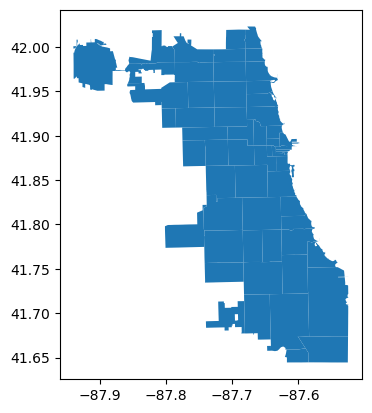

In [31]:
#MAP Shicago 
chi_zips.plot()

In [32]:
chi_zips.zip

0     60647
1     60639
2     60707
3     60622
4     60651
      ...  
56    60623
57    60629
58    60620
59    60637
60    60619
Name: zip, Length: 61, dtype: int64

In [54]:
#insurance_dataframe = insurance_dataframe.astype('str')

insurance_dataframe['zip']=insurance_dataframe['zip'].astype(str)
insurance_dataframe['per_rej']=insurance_dataframe['per_rej'].astype(int)

chi_zips['zip']=chi_zips['zip'].astype(str)


In [55]:
insurance_dataframe.dtypes

zip            object
Race          float64
Age           float64
Income          int64
per_rej         int64
fire_theft    float64
dtype: object

In [56]:
len(chi_zips)

61

In [57]:
#df2 = pd.concat([chi_zips, insurance_dataframe], ignore_index=True, sort=False)
col_list = insurance_dataframe["zip"].values.tolist()

chi_zips_p1 = chi_zips[chi_zips['zip'].isin(col_list)]


In [58]:
chi_zips_p1.head()

,objectid,shape_area,shape_len,zip,geometry
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917..."
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922..."
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895..."
5,38.0,2.350606e+07,34689.350631,60611,"POLYGON ((-87.61401 41.89354, -87.61369 41.893..."


In [59]:
insurance_dataframe.head()

,zip,Race,Age,Income,per_rej,fire_theft
0,60626,10.0,60.4,11744,0,35.2
1,60640,22.2,76.5,9323,3,53.5
2,60613,19.6,73.5,9948,20,46.5
3,60657,17.3,66.9,10656,8,44.7
4,60614,24.5,81.4,9730,10,61.6


In [60]:
#chi_zips_p1 = chi_zips_p1.join(insurance_dataframe, on='zip', how='left', lsuffix='_left')

#chi_zips_p1 = chi_zips_p1.join(insurance_dataframe, on='zip', how='left', lsuffix='_left')
#chi_zips_p1.merge(insurance_dataframe, on='zip', how = 'inner')

chi = chi_zips_p1.sort_values(['zip'], ascending=[False]).reset_index(drop=True)
insurance_dataframe1 = insurance_dataframe.sort_values(['zip'], ascending=[False]).reset_index(drop=True)



In [61]:
chi.head()

,objectid,shape_area,shape_len,zip,geometry
0,7.0,6.354776e+07,45646.488028,60657,"POLYGON ((-87.63799 41.94816, -87.63791 41.948..."
1,47.0,8.951588e+07,84430.973216,60656,"POLYGON ((-87.87596 41.97299, -87.87589 41.973..."
2,49.0,1.153801e+08,77392.322613,60655,"POLYGON ((-87.68184 41.71366, -87.68183 41.713..."
3,21.0,6.775983e+07,34316.361543,60653,"POLYGON ((-87.60267 41.83123, -87.60259 41.831..."
4,40.0,1.283098e+08,48187.949880,60652,"POLYGON ((-87.68305 41.75741, -87.68304 41.757..."


In [62]:
horizontal_stack = pd.concat([chi, insurance_dataframe1], axis=1, join = "inner")

In [63]:
horizontal_stack.columns

Index(['objectid', 'shape_area', 'shape_len', 'zip', 'geometry', 'zip', 'Race',
       'Age', 'Income', 'per_rej', 'fire_theft'],
      dtype='object')

In [64]:
horizontal_stack1 = horizontal_stack[['objectid', 'shape_area', 'shape_len', 'zip', 'geometry','Race','per_rej']].copy()


In [85]:
horizontal_stack1 = horizontal_stack1.loc[:,~horizontal_stack1.columns.duplicated()].copy()

horizontal_stack1.columns

Index(['objectid', 'shape_area', 'shape_len', 'zip', 'geometry', 'Race',
       'per_rej'],
      dtype='object')

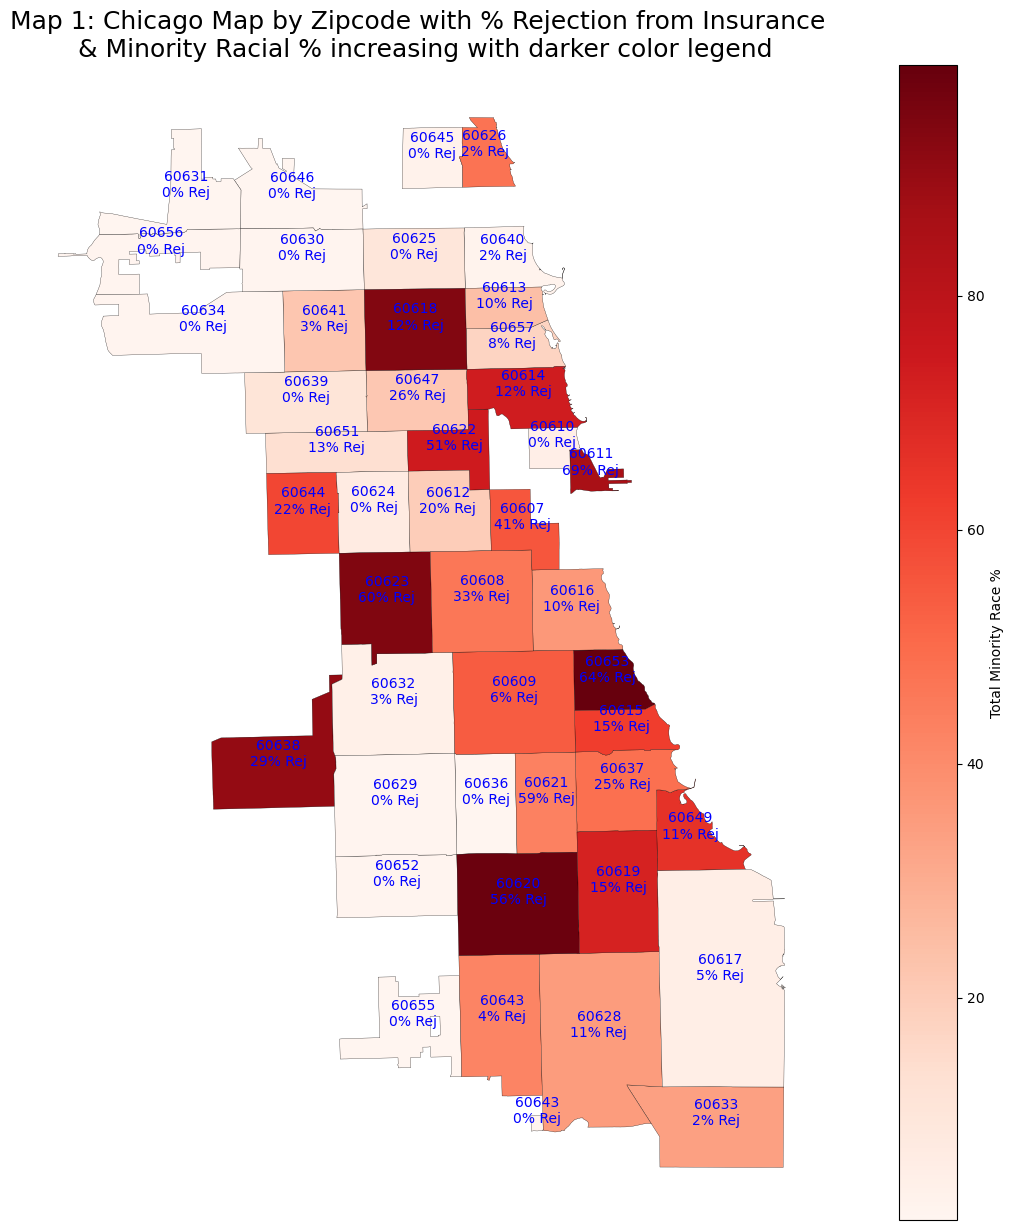

In [94]:
fig, ax = plt.subplots(figsize=(20,15))
ax.axis('off')
ax.set_title('Map 1: Chicago Map by Zipcode with % Rejection from Insurance \n & Minority Racial % increasing with darker color legend',
            fontdict={'fontsize': 18, 'fontweight':10})
# plot the map
horizontal_stack1.plot(ax=ax, column='Race',
            edgecolor='black', linewidth=.2,
            cmap='Reds', legend=True,
            legend_kwds={'label': 'Total Minority Race %'});

for _, row in horizontal_stack1.iterrows():
    xy = row['geometry'].centroid.coords
    ax.annotate(str(row['zip'])+"\n" + str(row['per_rej']) + "% Rej" , xy=xy[0],
                 horizontalalignment='center',
                 color='blue')




In [ ]:
horizontal_stack.head()

In [ ]:
horizontal_stack.columns

In [ ]:
#horizontal_stack = pd.concat([chi_zips_p1, insurance_dataframe], axis=1)


In [ ]:
horizontal_stack.head()

In [ ]:
chi_zips_p1.head(20)

In [ ]:
df_map.columns

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))


In [ ]:
df2.head(100)